In [310]:
import numpy as np # linaer algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [312]:
#df = df.iloc[: ,2:]

In [313]:
df.sample(5)

,Age,EstimatedSalary,Purchased
320,52,138000,1
362,47,50000,1
118,40,59000,0
398,36,33000,0
206,55,130000,1


In [314]:
x = df[['Age', 'EstimatedSalary']]


In [315]:
y = df['Purchased']

In [316]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x , y, test_size=0.3, random_state=0)

In [317]:
x_train.shape

(280, 2)

In [318]:
x_test.shape

(120, 2)

**StandardScaler**

In [319]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

..........now we will calculate the mean and and standard deviation by  function............
            by this we fit the x train input data .... in x trian we have two coloum or more precisely 2 innputs ...its calculate the mean value standard seviation and stores too...

In [320]:
scaler.fit(x_train)

StandardScaler()

In [321]:
x_train_scaled = scaler.transform(x_train)

In [322]:
x_test_scaled = scaler.transform(x_test)

In [323]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

37 age and 69k salary    written in scientic terms according to chatgpt

above just is mean of age and salary .... and we know it..

**transform train and test sets**

in below we are applying the formula which xi - bar x upon standard deviation ........

  ........ real values wil be transformed by new values which will be come out by formula ....
  also new values mean will be always 0 and standard deviation will be 1 ..........

intersting we learn  at the training data but we transform both xtrain and x test too....

In [324]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [325]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

.........since x both fit input we could see.. but problem is that its in numpy array ...and hard to undertand ......now then we convert fit arrar data into data frame........ by following functions

In [326]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = x_train.columns)

In [327]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [328]:
np.round(x_train.describe() , 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


**now x train is  scaled ....we could se in data frame t**

In [329]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


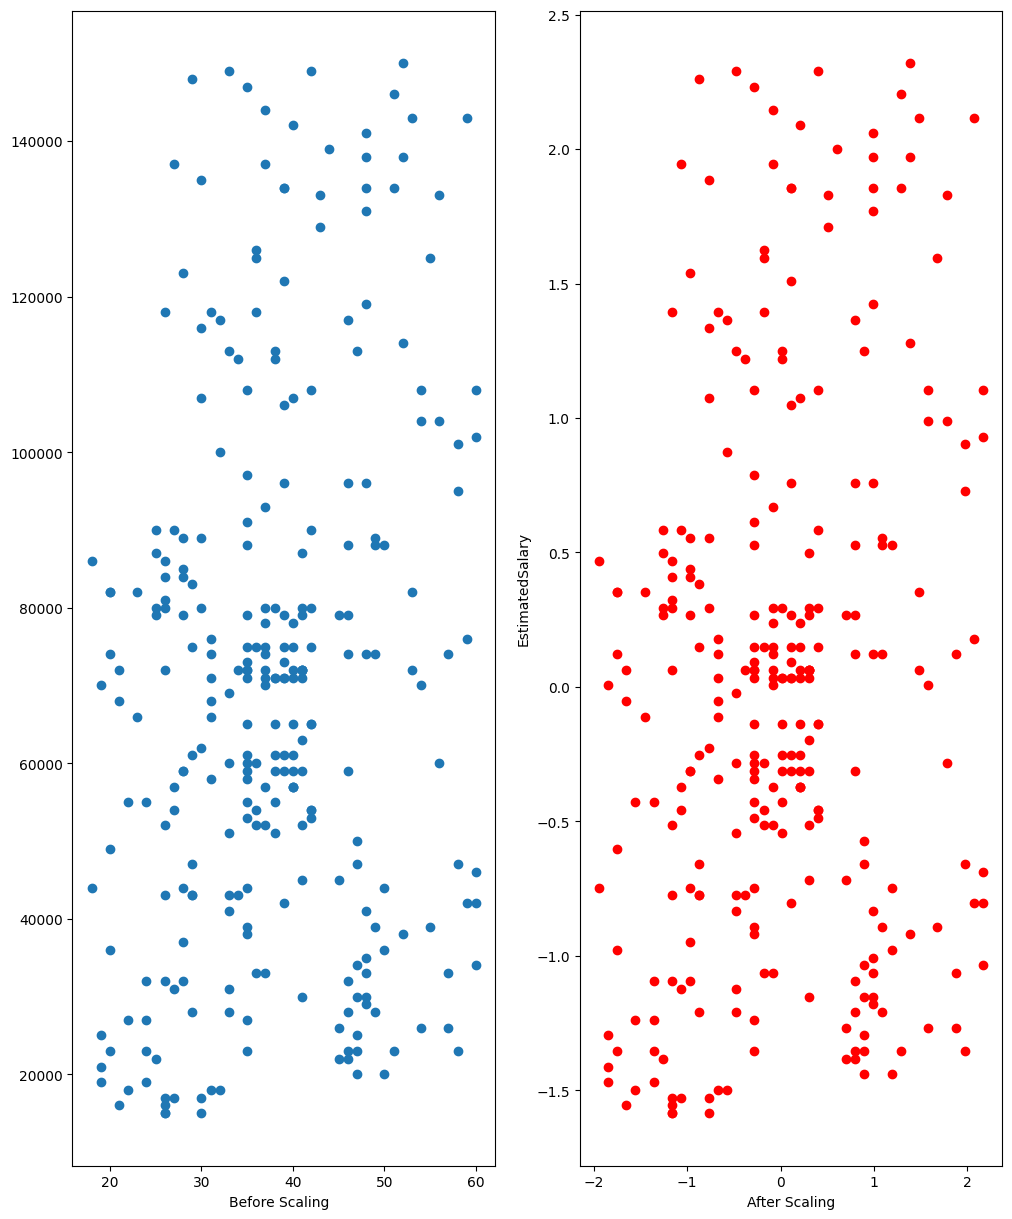

In [330]:
fig , (ax1 , ax2) = plt.subplots( ncols = 2 ,figsize =(12,15))
ax1.scatter(x_train['Age'] , x_train['EstimatedSalary'])
ax1.set_xlabel('Before Scaling  ')
ax2.scatter(x_train_scaled['Age'] , x_train_scaled['EstimatedSalary'] , color = 'red')
ax2.set_ylabel('EstimatedSalary')
ax2.set_xlabel('After Scaling')
plt.show()

before the data was clusterred at the 40  age and now its is culusstered at the mean 0 ....after scaling....

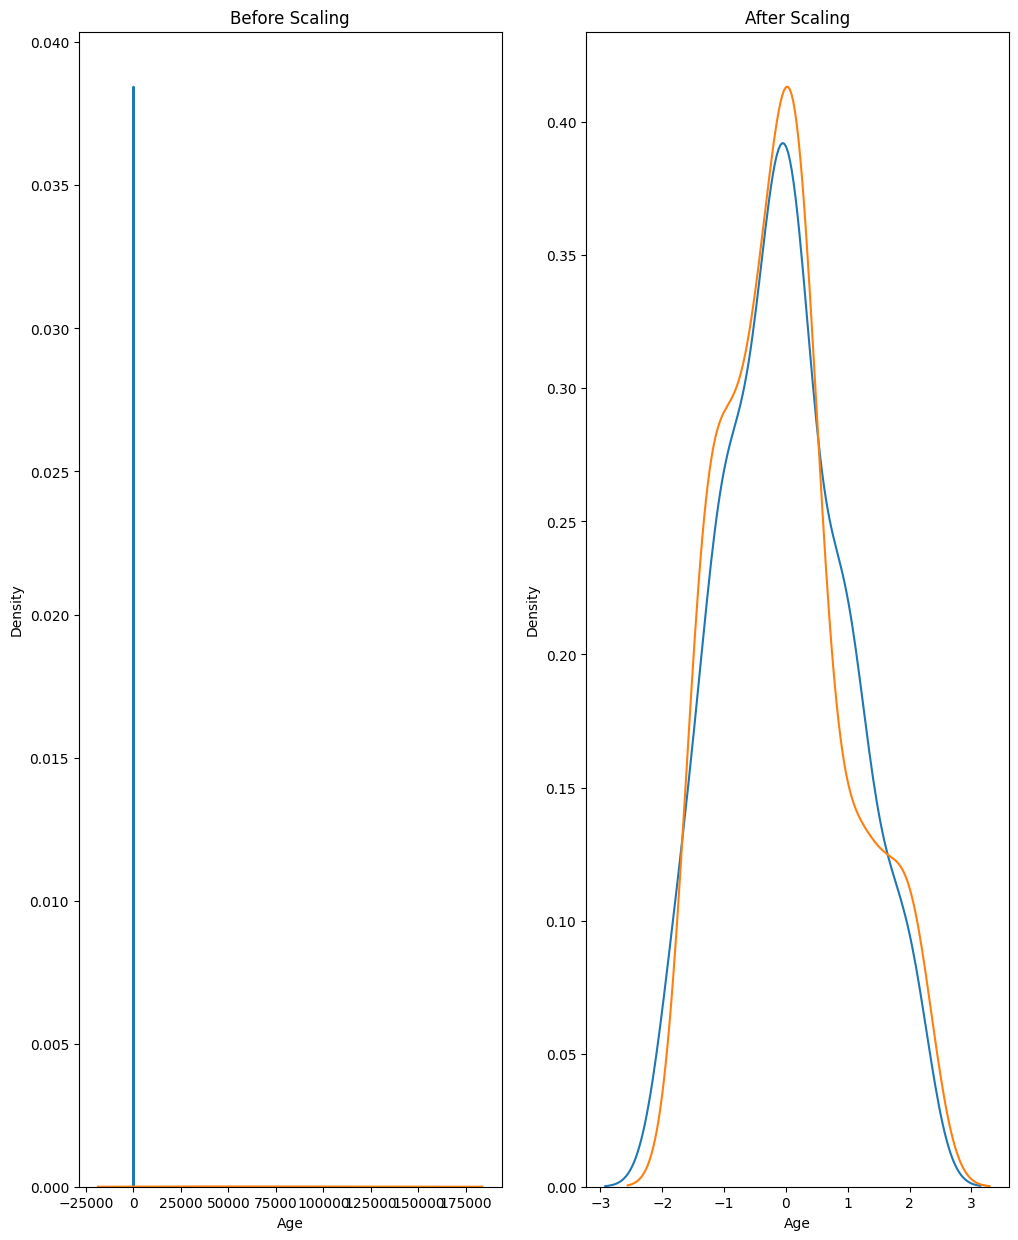

In [331]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 15))
# before scaling ....
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)
# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

**The line near X = 0 in the graph most likely represents actual Age values between 20–30, but the graph’s X-axis is distorted because of the large scale of Salary.

 What exactly is happening?
In your graph, the X-axis includes both Age and Salary

Salary values are very large (e.g., 50,000 – 100,000)

Age values are much smaller (e.g., 20 – 40)

So, matplotlib stretches the X-axis to make both Age and Salary fit on the same scale

As a result, Age values appear squished towards the left, close to X ≈ 0

**

**comparison distributions**

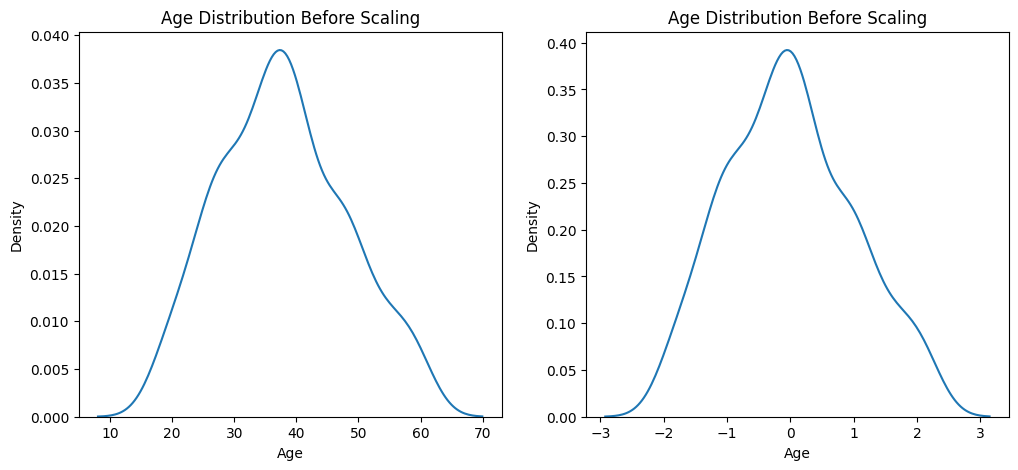

In [332]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (12,5))
#before scalling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'] , ax = ax1)
#after scalling
ax2.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train_scaled['Age'] , ax = ax2)
plt.show()

individually distribution do not change after scaling only  values changes....

In [333]:
from sklearn.linear_model import LogisticRegression

In [334]:
ir = LogisticRegression() # trained this value without scaling
ir_scaled = LogisticRegression()# trained tghis value with scaling

In [337]:
ir.fit(x_train , y_train)
ir_scaled.fit(x_train_scaled ,y_train)

LogisticRegression()

.....here we are predicting it .......... one we predict y by non scaling ......hen we predict y on scaling ...........

In [338]:
y_pred = ir.predict(x_test)
y_pred_scaled = ir_scaled.predict(x_test_scaled)

In [339]:
from sklearn.metrics import accuracy_score

In [340]:
print("Actual" , accuracy_score(y_test , y_pred))
print("Scaled" , accuracy_score(y_test , y_pred_scaled))



Actual 0.875
Scaled 0.8666666666666667


**here soemething eeror because sir actual output is 0.65 ..while mine is 0.87   ....it happens if  decion tree train then result actual and scaled willbe same but problem is that ia heve not implemented decion tree yet ....that the problem **